In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sentiment_analysis_spanish import sentiment_analysis


In [3]:
data=pd.read_csv('output/clean_data.csv',error_bad_lines=False)
data.head()

,Unnamed: 0,title,text,authors,journal
0,0,Últimas noticias del coronavirus en directo ...,Nota a los lectores EL PAÍS ofrece en abierto...,"['El País', 'Cati Cladera', 'Efe', 'Vídeo']",elpais
1,1,Bruselas podrá exigir la venta de parte de su ...,Bruselas ha colocado este martes las bases de ...,"['Lluís Pellicer', 'Pool']",elpais
2,2,El Gobierno del Reino Unido impondrá multas mi...,El Gobierno del Reino Unido ha anunciado final...,"['Rafa De Miguel', 'Andy Rain']",elpais
3,3,¿Y si Canarias fuera la fuente de tierras rara...,“Canarias no es solo turismo de sol y playa n...,"['Guillermo Vega', 'Kate Passileggeri', 'Eyeem']",elpais
4,4,Pornhub borra dos tercios de los vídeos de su ...,Pornhub cede a las presiones y borra los vídeo...,"['Jaime Porras Ferreyra', 'Getty Images', 'M. ...",elpais


In [4]:
list_keywords_coronavirus = ["Coronavirus", "coronavirus", "covid", "Covid", "pandemia", "Pandemia", "vacuna", "Vacuna",
                             "virus", "Virus", "Segunda ola", "segunda ola", "vacunación", "Vacunación", "Vacunar", "vacunar",
                            "contagios", "contagiados", "Contagiados", "Contagios"]

In [5]:
data['title'] = data['title'].astype(str)

def isCoronavirus(text):
        if any(word in text for word in list_keywords_coronavirus):
            return 1
        else:
            return 0

In [6]:
data['isArticleCoronavirus'] = data["title"].apply(isCoronavirus)


In [7]:
data_covid = data[data.isArticleCoronavirus == 1]

Text(0.5, 1.0, 'Counts isArticleCoronavirus per journal')

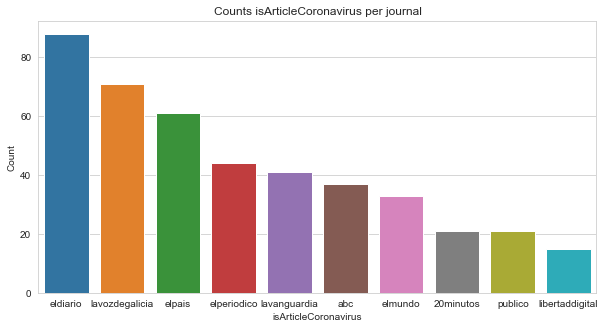

In [12]:
z=data_covid.groupby(by=['journal'],as_index=False).count().sort_values(by='isArticleCoronavirus',ascending=False).head(10)

plt.figure(figsize=(10,5))
sns.set_style("whitegrid")
ax = sns.barplot(x=z['journal'],y=z['isArticleCoronavirus'], data=z)
plt.xlabel("isArticleCoronavirus")
plt.ylabel("Count")
plt.title("Counts isArticleCoronavirus per journal")

In [14]:
def getSentiment(text):
    sentiment = sentiment_analysis.SentimentAnalysisSpanish()
    return sentiment.sentiment(text)

In [ ]:
data['sentiment'] = data["title"].apply(getSentiment)
